<h1 align="center">Use Circle Fitting to fit Coins</h1>

In this notebook, we use Hough transform to detect coins in images. We use circle fitting to find the center and radius of the coins in the image. We replot the circles with same radius and center as the coins. For verifying the implementation, we try to detect all the coins in the image. 

### Import Libraries and Plot Input *Image*

In [1]:
#Import relevant libraries
import numpy as np
import cv2 as cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math

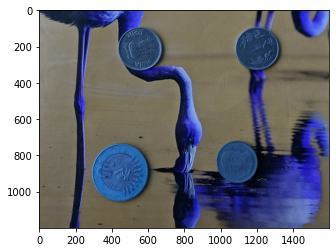

In [2]:
#Read and plot the image
inputImg = cv2.imread('CoinsInput2.jpeg')
plt.imshow(inputImg)
plt.show()

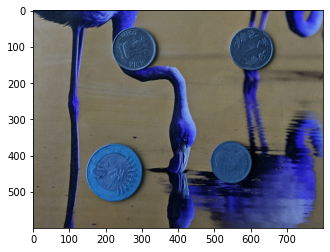

In [3]:
#Resize the image as the image size is too large
h, w = inputImg.shape[:-1]
img = cv2.resize(inputImg, (int(w//2), int(h//2)), interpolation = cv2.INTER_NEAREST)

plt.imshow(img)
plt.show()

### Apply Canny Edge Detector

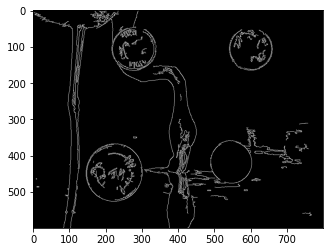

In [4]:
#Apply Canny Edge detector 
canny = cv2.Canny(img, 100, 400)
plt.imshow(canny, cmap='gray')
plt.show()

### Circle Fitting using Hough Transform

Here we use Hough transform to get the parameter space of the image and create the accumulator array. After creating and incrementing the counts in accumulator array, we find the radius and coordinates of the center of the coins and return them. 

We also define coverAccumulator function that resets the counts of the points close to the center of the circle in the accumulator array to avoid returning the parameters of the same coin repeatedly.

In [5]:
#This function sets the count to zero for the points close to x,y,z in the 
#accumulator array
def coverAccumulator(ac, x, y, z, w):
  for i in range(x-w//2, x+w//2):
    for j in range(y-w//2, y+w//2):
      for k in range(z-w//2, z+w//2):
        if(i >=0 and j >= 0 and k >= 0 and i < ac.shape[0] and j < ac.shape[1] and k < ac.shape[2]):
          ac[i][j][k] = -1
  return ac

In [6]:
#This function returns array of coin parameters(center and radius)
def circleFitting(Img, coinNum):
  height, width = Img.shape
  xpts = []
  ypts = []

  #Store coordinates of all the white points
  for x in range(0, width):
    for y in range(0, height):
      if(Img[y][x] > 0):         
        xpts.append(x)
        ypts.append(y)

  #Create accumulator array
  accumulator = np.zeros(shape=(width+1, height+1, 150))

  #The following loop increments count in the accumulator array
  for i in range(len(xpts)):
    #Assume that radius is in between 40 and 100 for all coins
    for r in range(40, 100):
      for y in range(0, height):
        t = r*r - (y-ypts[i])*(y-ypts[i])
        if(t > 0):
          x1 = xpts[i] + int(math.sqrt(t))
          x2 = xpts[i] - int(math.sqrt(t))
          if(x1 >= 0 and x1 < width):
            accumulator[x1][y][r] += 1
          if(x2 >= 0 and x2 < width):
            accumulator[x2][y][r] += 1

  #Store the center and radius of all the coins and return
  coinsParams = []
  for i in range(coinNum):
    (x, y, r) = np.unravel_index(accumulator.argmax(), accumulator.shape)
    accumulator = coverAccumulator(accumulator, x, y, r, 50)
    coinsParams.append([x, y, r])

  return coinsParams

In [7]:
coinParams = circleFitting(canny, 4)
print(coinParams)

[[223, 448, 78], [600, 107, 58], [278, 105, 60], [547, 419, 57]]


In [8]:
#Multiply the coordinates by 2 to resize to original image
for coordinate in coinParams:
  coordinate[0] *= 2
  coordinate[1] *= 2
  coordinate[2] *= 2

print(coinParams)

[[446, 896, 156], [1200, 214, 116], [556, 210, 120], [1094, 838, 114]]


### Plot the circles and display the output image

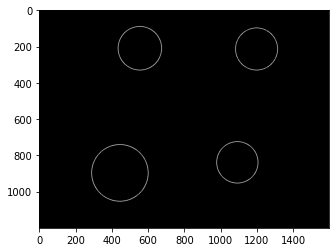

In [9]:
#Plot the circles on black image
output = np.zeros_like(inputImg)
for param in coinParams:
  cv2.circle(output, (param[0], param[1]), param[2], (255, 255, 255), 2)

plt.imshow(output, cmap='gray')
plt.show()

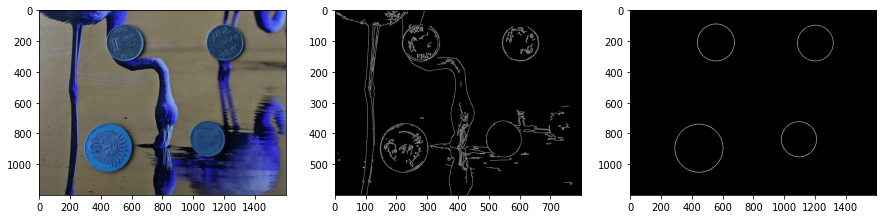

In [10]:
#Output
plt.figure(figsize=(15, 30))  
plt.subplot(1,3,1)
plt.imshow(inputImg)
plt.subplot(1,3,2)
plt.imshow(canny, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(output)
plt.show()

In [11]:
cv2.imwrite('output.jpeg', output)
cv2.imwrite('canny.jpeg', canny)

True